## Методы прикладной статистики

### Семинар 1. Основы визуального анализа, проверка гипотез

#### План семинара

1. Визуальный анализ для работы с распределениями:
    1. Форма распределения.
    2. Оценка нормальности распределения
    3. qq-plot
2. Простые методы проверки простых гипотез.
3. Рассчет размера релеватной выборки для проверки гипотез.

### Часть 0. Необходимые импорты

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import pandas as pd

%matplotlib inline

### Часть 1. Генерация случайных величин и визуализация

#### 1.1 Генерация случайных величин и визуализация графиков плотности

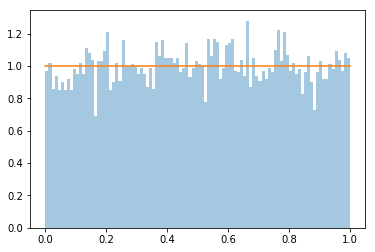

In [4]:
sample = np.random.rand(10000)
sns.distplot(sample, bins = 100, kde = False, norm_hist=True)
plt.plot(np.linspace(0,1), [1. for _ in np.linspace(0,1)])

In [5]:
from scipy.stats import norm

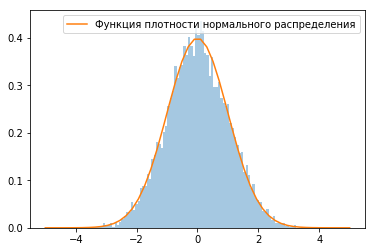

In [6]:
sns.distplot(np.random.randn(10000), bins = 100, kde = False, norm_hist=True)
plt.plot(np.linspace(-5,5), [norm.pdf(_) for _ in np.linspace(-5,5)])
plt.legend(['Функция плотности нормального распределения'])

Тем самым мы видим, как:
1. Сгенерировать выборку определенного размера.
2. Построить график плотности.

Построим график эмпирической функции распределения как еще один способ визуальной оценки распределения

In [7]:
from statsmodels.distributions.empirical_distribution import ECDF

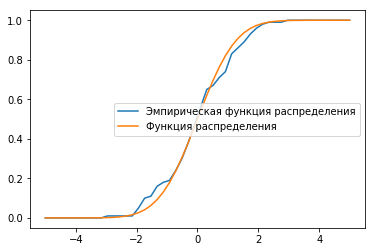

In [8]:
ecdf = ECDF(np.random.randn(100))  # Строим функцию для построения эмпирической функции распределения

plt.plot(np.linspace(-5, 5), ecdf(np.linspace(-5, 5)))
plt.plot(np.linspace(-5, 5), norm.cdf(np.linspace(-5, 5)))

plt.legend(['Эмпирическая функция распределения', 'Функция распределения'])

In [9]:
def draw_ecdf_with_cdf(linspace, distribution, sample_size):
    sample = distribution.rvs(size=sample_size)
    ecdf = ECDF(sample)
    
    plt.plot(linspace, ecdf(linspace))
    plt.plot(linspace, distribution.cdf(linspace))
    
    plt.legend([
        'Эмпирическая функция распределения',
        'Функция распределения'
    ])

Рассмотрим примеры других часто используемых распределений случайных величин

#### Нормальное распределение

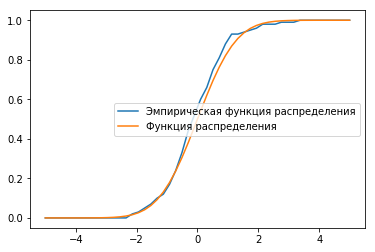

In [10]:
draw_ecdf_with_cdf(np.linspace(-5, 5), norm, 100)

#### Экспоненциальное распределение

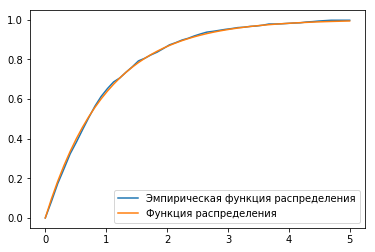

In [11]:
from scipy.stats import expon
draw_ecdf_with_cdf(np.linspace(0, 5), expon, 1000)

In [12]:
from scipy.stats import t

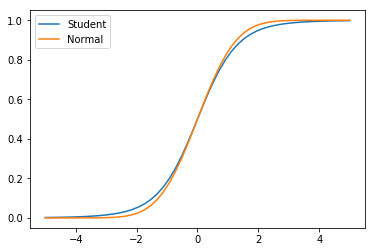

In [13]:
GRID = np.linspace(-5, 5)
plt.plot(GRID, t(5).cdf(GRID))
plt.plot(GRID, norm.cdf(GRID))
plt.legend(['Student', 'Normal'])

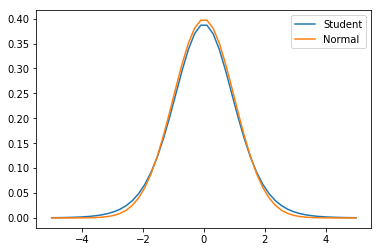

In [14]:
plt.plot(GRID, t(10).pdf(GRID))
plt.plot(GRID, norm.pdf(GRID))
plt.legend(['Student', 'Normal'])

Как можно увидеть, у распределения Стьюдента более тяжелые хвосты, но оно сильно похоже на нормальное распределение. Проверим на меньшем количестве степеней свободы.

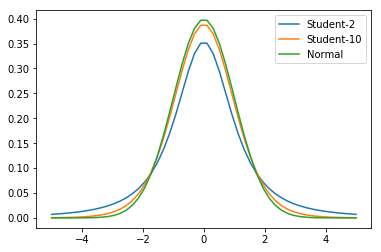

In [15]:
plt.plot(GRID, t(2).pdf(GRID))
plt.plot(GRID, t(10).pdf(GRID))
plt.plot(GRID, norm.pdf(GRID))
plt.legend(['Student-2', 'Student-10', 'Normal'])

Чем больше степеней свободы, тем меньше хвостов, и оно ближе к нормальному распределению.

#### 1.2 QQ-plot

QQ-plot позволяет визуально определить, лежат ли данные в необходимом семействе распределений.

`scipy.stats.probplot` позволяет визуально оценить, является ли выборка нормальной или нет.

1) Нормальное распределение

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([-3.60916889, -3.48475152, -3.21754348, ...,  3.37553809,
          3.45852709,  3.7661457 ])),
 (0.9988971672436333, 0.0028590156966023647, 0.9998517850510031))

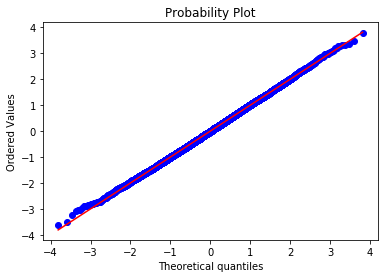

In [16]:
scipy.stats.probplot(norm.rvs(size=10000), plot=plt)

Для нормального распределения - это практически прямая.

2) Рассмотрим распределение Стьюдента - распределение с <i>тяжелыми хвостами</i>.

((array([-3.63568806, -3.40036853, -3.27067228, ...,  3.27067228,
          3.40036853,  3.63568806]),
  array([-5.689022  , -4.72588407, -4.56164849, ...,  6.06202733,
          6.11940609,  8.3846599 ])),
 (1.124020534638585, -0.00510726526737422, 0.994143589578056))

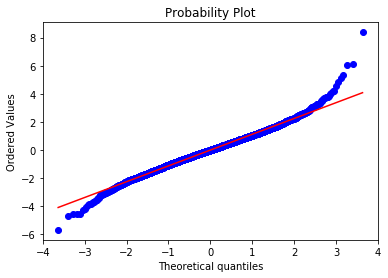

In [17]:
scipy.stats.probplot(t(10).rvs(size=5000), plot=plt)

Как видно на графике, правый конец поднят выше, а левый - ниже прямой.

Тем самым, при помощи `qq-plot`-а можно различить нормальную выборку от выборку из распределения Стьюдента.

3) Расссмотрим распределение Вейбулла - распределение с легкими хвостами.

((array([-3.63568806, -3.40036853, -3.27067228, ...,  3.27067228,
          3.40036853,  3.63568806]),
  array([0.05157639, 0.07322556, 0.07597478, ..., 2.15223366, 2.34917742,
         2.59054907])),
 (0.3727352355514607, 0.8869126222732706, 0.9944850903928336))

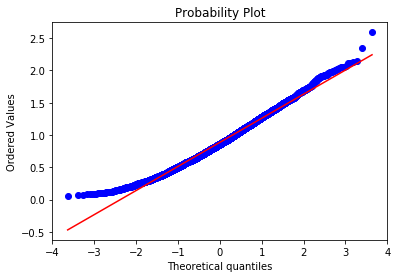

In [18]:
from scipy.stats import weibull_min
scipy.stats.probplot(weibull_min(2.5).rvs(size=5000), plot=plt)

4) Рассмотрим экспоненциальное распределение - смещено вправо.

((array([-3.63568806, -3.40036853, -3.27067228, ...,  3.27067228,
          3.40036853,  3.63568806]),
  array([1.53244398e-04, 6.27311402e-04, 6.78608902e-04, ...,
         7.19225908e+00, 7.28338550e+00, 9.83782980e+00])),
 (0.9183177235943615, 1.0082605686059665, 0.901378116763647))

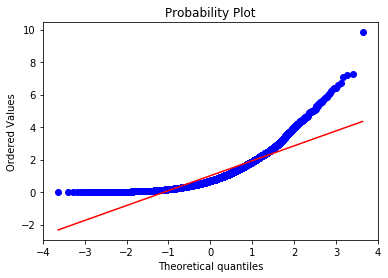

In [19]:
scipy.stats.probplot(expon.rvs(size=5000), plot=plt)

Поведение графика - оба конца выше прямой.

5) Для распределения с менее тяжелым хвостом возьмем `развернутое экспоненциальное`, оно смещено влево

((array([-3.63568806, -3.40036853, -3.27067228, ...,  3.27067228,
          3.40036853,  3.63568806]),
  array([-1.01726098e+01, -6.35383259e+00, -6.25451905e+00, ...,
         -2.96287533e-04, -2.24351675e-04, -4.95248893e-05])),
 (0.8714061502508726, -0.9884221736991127, 0.9156979473261024))

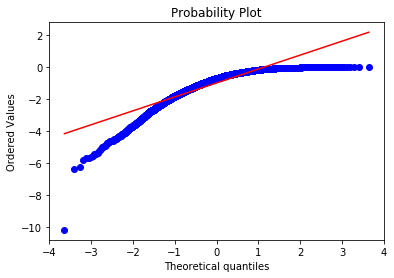

In [20]:
scipy.stats.probplot(-expon.rvs(size=5000), plot=plt)

Поведение графика - оба конца ниже прямой.

<b>Вывод</b>

По поведению графика qq-plot оценить форму хвостов для непрерывного распределения.
1. Почти прямая - скорее всего, нормальное распределение
2. Правый конец выше, а левый ниже - тяжелые хвосты (больше дисперсия на каждом из хвостов)
3. Левый конец выше, а правый ниже - легкие хвосты - (меньше дисперсия на каждом из хвостов)
4. Оба конца выше - смещено вправо (дисперсия больше на правом конце, меньше - на левом)
5. Оба конца ниже - смещено влево (дисперсия меньше на левом конце, больше - на правом)

Эмпирически концы смотрятся относительно медианы распределения>

### Практический пример

Рассмотрим данные о болезнях пользователей:

In [22]:
df = pd.read_csv('./Data/Aids2.csv')

In [23]:
df.head()

,state,sex,diag,death,status,categ,age
0,NSW,M,10905,11081,D,hs,35
1,NSW,M,11029,11096,D,hs,53
2,NSW,M,9551,9983,D,hs,42
3,NSW,M,9577,9654,D,haem,44
4,NSW,M,10015,10290,D,hs,39


((array([-3.4875009 , -3.24283749, -3.10748762, ...,  3.10748762,
          3.24283749,  3.4875009 ]), array([ 0,  0,  0, ..., 78, 80, 82])),
 (9.934051613622259, 37.409074920858245, 0.9862433845651769))

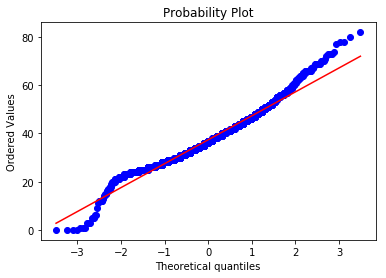

In [24]:
scipy.stats.probplot(df['age'], plot=plt)

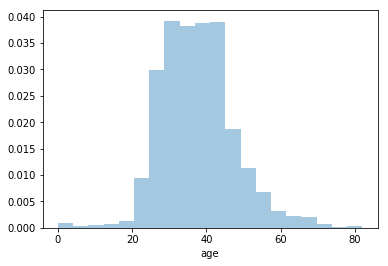

In [25]:
sns.distplot(df['age'], bins = 20, kde = False, norm_hist=True)

Что можно сказать о характере распределения возраста людей?

Является ли оно нормальным? В какую сторону видно смещение? Как это отражается на qq-plot?

Рассмотрим отдельно данные по женщинам и мужчинам:

In [ ]:
women_df = df[df['sex'] == 'F']
_, _ = scipy.stats.probplot(women_df['age'], plot=plt)

In [ ]:
men_df = df[df['sex'] == 'M']
_, _ = scipy.stats.probplot(men_df['age'], plot=plt)

Какой вывод можно сделать о женщинах и мужчинах и их добросовестном отношении к своему здоровью?

In [26]:
# Чтение займет около одной минуты!
df_retail = pd.read_excel('./Data/OnlineRetail.xlsx')

In [27]:
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


((array([-4.70343812, -4.51912661, -4.41934216, ...,  4.41934216,
          4.51912661,  4.70343812]),
  array([-11062.06, -11062.06,      0.  , ...,  16888.02,  17836.46,
          38970.  ])),
 (8.233852527586608, 4.611113626088513, 0.08509504898081767))

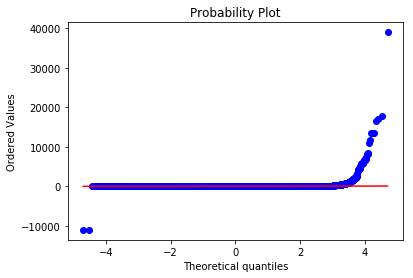

In [28]:
scipy.stats.probplot(df_retail['UnitPrice'], plot=plt)

Рассмотрим мелкие продажи:

In [29]:
filtered_df_retail = df_retail[
    (df_retail['UnitPrice'] < 100) & (df_retail['UnitPrice'] > 0) & (df_retail['Quantity'] > 0)
]

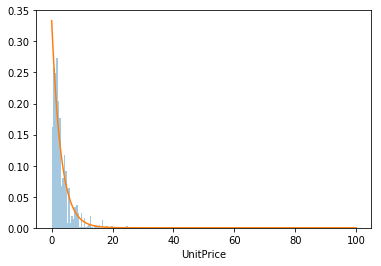

In [30]:
sns.distplot(filtered_df_retail['UnitPrice'], bins = 200, kde = False, norm_hist=True)
plt.plot(np.linspace(0, 100, 500), expon(scale=3).pdf(np.linspace(0, 100, 500)))

((array([-4.69862826, -4.51413587, -4.41424792, ...,  4.41424792,
          4.51413587,  4.69862826]),
  array([1.000e-03, 1.000e-03, 1.000e-03, ..., 9.879e+01, 9.996e+01,
         9.996e+01])),
 (3.0297858776264857, 3.2921168731059605, 0.7967091670474535))

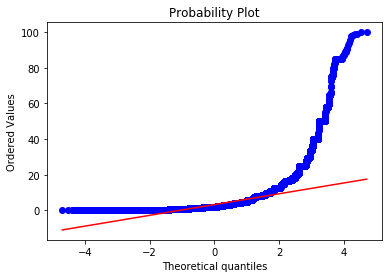

In [31]:
scipy.stats.probplot(filtered_df_retail['UnitPrice'], plot=plt)

## Проверка гипотез

Предполагаем гипотезу - в среднем продавалось 10 товаров. 

Будем рассматривать статистику Вальда:

$$ T(X) = \frac{\sum_{i=1}^{n}X_i - n\mu}{\sqrt{ns^2}} $$

ри $H_0$ статистика Вальда стремится к $N(0, 1)$ с ростом количества элементов выборки. Тест устроен следующим образом:

Если $|T(X)| > u_{1-\alpha/2}$, то гипотеза $H_0$ отвергается, иначе $H_0$ принимается. Будем проводить тест с уровнем значимости $\alpha = 0.05$. 

In [32]:
def calc_wald_statistics(X, samples_count, assumed_mean):
    X = np.array(X)[: samples_count]
    n = len(X) 
    return (X.sum() - n * assumed_mean) / np.sqrt(n * X.var(ddof=1))


def calc_wald_statistics_multirow(X, samples_count, assumed_mean):
    X = np.array(X)[:, : samples_count]
    n = X.shape[1] 
    return (X.sum(axis=1) - n * assumed_mean) / np.sqrt(n * X.var(ddof=1, axis=1))

In [33]:
from tqdm import tqdm

In [34]:
calc_wald_statistics(filtered_df_retail['Quantity'], 100000, 9.86)

0.3708380755653729

Найдем квантили нормального распределения

In [35]:
alpha = 0.05
norm_threshold = norm.ppf(1.0 - 0.5 * alpha)

In [36]:
norm_threshold

1.959963984540054

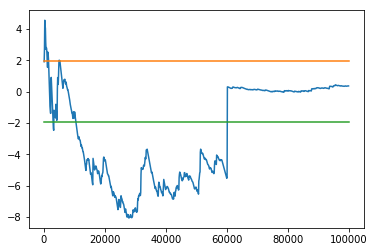

In [37]:
wald_results = []
GRID = np.linspace(100, 100000, 991).astype(int)
for samples_count in GRID:
    result_value = calc_wald_statistics(filtered_df_retail['Quantity'], samples_count, 9.86)
    wald_results.append(result_value)
    
plt.plot(GRID, wald_results)
plt.plot(GRID, np.ones_like(GRID) * norm_threshold)
plt.plot(GRID, np.ones_like(GRID) * (-norm_threshold))

Что можно увидеть из графика?

Есть данные, которые явно сбивают оценку со среднего значения. Следовательно, в оценку среднего значения включены данные не только по малым, но и большим продажам.

Уберем данные по явно оптовым продажам:

In [38]:
filtered_df_quantity_retail = filtered_df_retail[
    (filtered_df_retail['Quantity'] < 100) & (filtered_df_retail['Quantity'] > 0)
]

In [39]:
np.mean(filtered_df_quantity_retail['Quantity'])

7.629143419129184

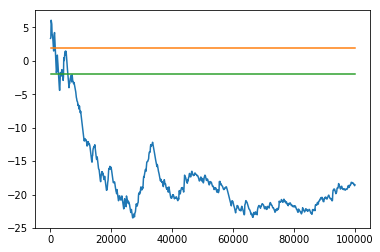

In [40]:
wald_results = []
GRID = np.linspace(100, 100000, 991).astype(int)
for samples_count in GRID:
#     print(samples_count)
    result_value = calc_wald_statistics(filtered_df_quantity_retail['Quantity'], samples_count, 7.62)
    wald_results.append(result_value)
    
plt.plot(GRID, wald_results)
plt.plot(GRID, np.ones_like(GRID) * norm_threshold)
plt.plot(GRID, np.ones_like(GRID) * (-norm_threshold))

In [41]:
filtered_df_quantity_retail['Quantity'][:100000].mean()

6.97376

Перемешаем данные - разница оказалась достаточно сильной!

In [42]:
filtered_df_quantity_retail = filtered_df_quantity_retail.sample(frac=1).reset_index(drop=True)

In [43]:
filtered_df_quantity_retail['Quantity'][:100000].mean()

7.64686

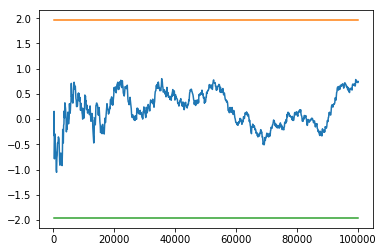

In [44]:
wald_results = []
GRID = np.linspace(100, 100000, 991).astype(int)
for samples_count in GRID:
    result_value = calc_wald_statistics(filtered_df_quantity_retail['Quantity'], samples_count, 7.62)
    wald_results.append(result_value)
    
plt.plot(GRID, wald_results)
plt.plot(GRID, np.ones_like(GRID) * norm_threshold)
plt.plot(GRID, np.ones_like(GRID) * (-norm_threshold))

Тем самым, явно прослеживается в данных тенденция к неслучайности!! Поэтому важно использовать сведения о том, что у нас имеется выборка, и в ней нет никаких трендов!

### Вычисляем объем необходимой выборки

Предположим, что необходимо с высокой точностью определить рамки, в которых необходимо с большой вероятностью определить значение параметра, при этом определить минимальный объем выборки, необходимый для проведения эксперимента.

Тогда необходимо вычислить доверительный интервал для параметра с заранее определенным уровнем доверия, а после чего, имея исходное предположение, оценить размер выборки.

Рассмотрим пример:

$$ T(X) = \frac{\sum_{i=1}^{n}X_i - n\mu}{\sqrt{ns^2}} \rightarrow \mathcal{N}(0, 1) $$

Важное предположение: рассмотрим значения стандартного отклонения, покажем, что в нашем случае $s^2$ можно принять за одинаковое число.

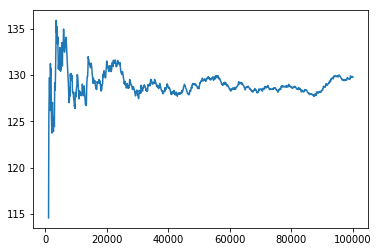

In [45]:
s2_results = []
GRID = np.linspace(1000, 100000, 991).astype(int)
for samples_count in GRID:
    result_value = np.var(filtered_df_quantity_retail['Quantity'][:samples_count], ddof=1)
    s2_results.append(result_value)
plt.plot(GRID, s2_results)

Видно, что с появлением большего числа данных выборка нормализируется, примем значение $s^2=130$ из графика. Важно проверять это предположение, а лучше пользоваться t-критерием Стьюдента для того, чтобы избавиться от константности $s^2$, но предельное распределение уже будет другим.

В нашем случае:

$$ T(X) = \frac{\sum_{i=1}^{n}X_i - n\mu}{\sqrt{130n}} \rightarrow \mathcal{N}(0, 1) $$

Тогда

$$ P\left(-z_{1 - \alpha / 2} \le \frac{\sum_{i=1}^{n}X_i - n\mu}{\sqrt{130n}} \le z_{1 - \alpha / 2}\right) = \alpha$$

$$ P\left(-z_{1 - \alpha / 2} \le \frac{X - \mu}{\sqrt{130 / n}} \le z_{1 - \alpha / 2}\right) = \alpha$$

$$ P\left(X - z_{1 - \alpha / 2} \cdot \sqrt{130 / n} \le \mu \le X + z_{1 - \alpha / 2} \cdot \sqrt{130 / n}\right) = \alpha$$

В итоге, если мы хотим, чтобы среднее попало в промежуток $(7.3, 7.9)$, то необходимо выполнить условия

$$ 2 \cdot z_{1 - \alpha / 2} \cdot {\sqrt{130 / n}} \le 0.6$$

$$ z_{1 - \alpha / 2} \cdot {\sqrt{130 / n}} \le 0.3$$

$$ z_{1 - \alpha / 2} \cdot \sqrt{130} \le 0.3 \sqrt{n}$$

$$ n \ge 5700 $$ (вычисления были проделаны на калькуляторе)

Таким образом, с такой погрешностью можно применять результат с не менее чем 6000 наблюдениями.

Есть дополнительно практический способ провести эксперимент, если известно, из какого распределения взята выборка.

В нашем случае - будем брать незавивисимые подвыборки (возьмем 1000 подвыборок).

In [46]:
samples = np.array([
    np.random.choice(
        filtered_df_quantity_retail['Quantity'], 100000
    ) for i in range(1000)
])

In [47]:
samples.shape

(1000, 100000)

In [48]:
calc_wald_statistics_multirow(samples, 10000, 7.62).shape

(1000,)

In [49]:
significance_levels = list()
estimated_true_thresholds = list()
iters_count = 1000

for n in tqdm(range(10, 1000 + 1, 10)):
    h0_stat_values = calc_wald_statistics_multirow(samples, n, 7.62)
    
    significance_levels.append(np.sum(np.abs(h0_stat_values) > norm_threshold) / float(iters_count))
    estimated_true_thresholds.append(np.percentile(np.abs(h0_stat_values), (1.0 - alpha) * 100.0))

100%|██████████| 100/100 [00:11<00:00,  8.37it/s]


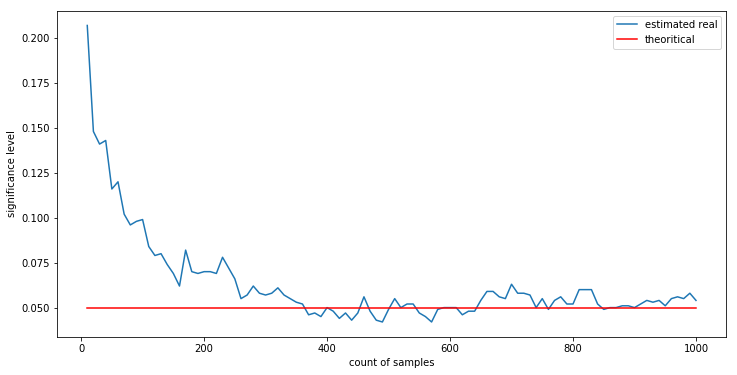

In [50]:
plt.figure(figsize=(12, 6))
plt.xlabel("count of samples")
plt.ylabel("significance level")
plt.plot(range(10, 1000 + 1, 10), significance_levels, label="estimated real")
plt.plot(range(10, 1000 + 1, 10), [0.05 for _ in range(10, 1000 + 1, 10)], color='red', label="theoritical")
plt.legend(loc = 1)

## Что умеем?

1. Визуально по графику оценивать, подходит ли распределение под данные или нет.
2. Строить qq-plot, функцию распределения, эмпирическую функцию распределения.
3. При помощи qq-plot рассматривать ситуацию по сегментам (мужчины, женщины).
4. Проверять гипотезу для среднего значения параметра, вычислять практический уровень значимости.
5. Определять необходимый объем выборки для проведения эксперимента.